<a href="https://colab.research.google.com/github/Alishapunw/Data-Science-Bootcamp/blob/Master---Homework-Assignments/PracticeAssignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('glass.csv')
glass.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

In [ ]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

# New section

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm

array([[160,   3],
       [ 25,  26]])

In [ ]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969552


1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

In [ ]:
# changing threshold and predicting
print('prediction with threshold 0.9 :')
y_pred_new_threshold = (logreg.predict_proba(X)[:, 1] >= 0.9).astype(int)
print(y_pred_new_threshold)

# Evaluation metrics for threshold 0.9
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Evaluation metrics with threshold 0.9:")
print("Accuracy:", accuracy_score(y, y_pred_new_threshold))
print("Precision:", precision_score(y, y_pred_new_threshold))
print("Recall:", recall_score(y, y_pred_new_threshold))
print("F1 score:", f1_score(y, y_pred_new_threshold))



prediction with threshold 0.9 :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Evaluation metrics with threshold 0.9:
Accuracy: 0.7990654205607477
Precision: 1.0
Recall: 0.1568627450980392
F1 score: 0.2711864406779661


2. Do the same analysis for other columns

In [ ]:
#selecting column Mg for analysis
glass.sort_values( by = 'Mg', inplace=True)
X1= np.array(glass.Mg).reshape(-1,1)
y1 = glass.household
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X1,y1)
pred = logreg.predict(X1)
logreg.coef_, logreg.intercept_

(array([[-1.33238071]]), array([1.7807468]))

In [ ]:
glass['household_pred_prob1'] = logreg.predict_proba(X1)[:, 1]
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob1
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,0,0.855789
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.855789
183,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.00,6,1,0.855789
182,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6,1,0.855789
173,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,1,0.855789
...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.51829,13.24,3.90,1.41,72.33,0.55,8.31,0.00,0.10,2,0,0.031813
133,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15,2,0,0.030605
114,1.51847,13.10,3.97,1.19,72.44,0.60,8.43,0.00,0.00,2,0,0.029063
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,2,0,0.028689


In [ ]:
# changing threshold and predicting
print('prediction with threshold 0.8 :')
y_pred_new_threshold1 = (logreg.predict_proba(X)[:, 1] >= 0.8).astype(int)
print(y_pred_new_threshold1)

# Evaluation metrics for threshold 0.9
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Evaluation metrics with threshold 0.8:")
print("Accuracy:", accuracy_score(y, y_pred_new_threshold1))
print("Precision:", precision_score(y, y_pred_new_threshold1))
print("Recall:", recall_score(y, y_pred_new_threshold1))
print("F1 score:", f1_score(y, y_pred_new_threshold1))

prediction with threshold 0.8 :
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Evaluation metrics with threshold 0.8:
Accuracy: 0.7570093457943925
Precision: 0.0
Recall: 0.0
F1 score: 0.0


3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

In [ ]:
#split dataset in features and target variable
feature_cols = ['RI', 'Na', 'Mg','Al']
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
X = glass[feature_cols] # Features
y = glass.household # Target variable

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

4. Plot ROC Curves for each model

Area Under the ROC Curve for threshold 0.5: 0.8678571428571428


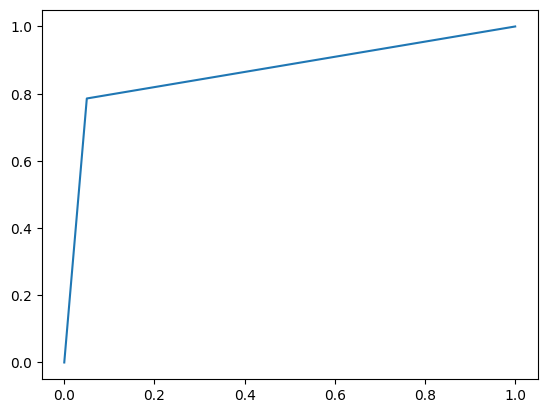

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,  label = 'Threshold = 0.5')
print('Area Under the ROC Curve for threshold 0.5:', roc_auc_score(y_test, y_pred))

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


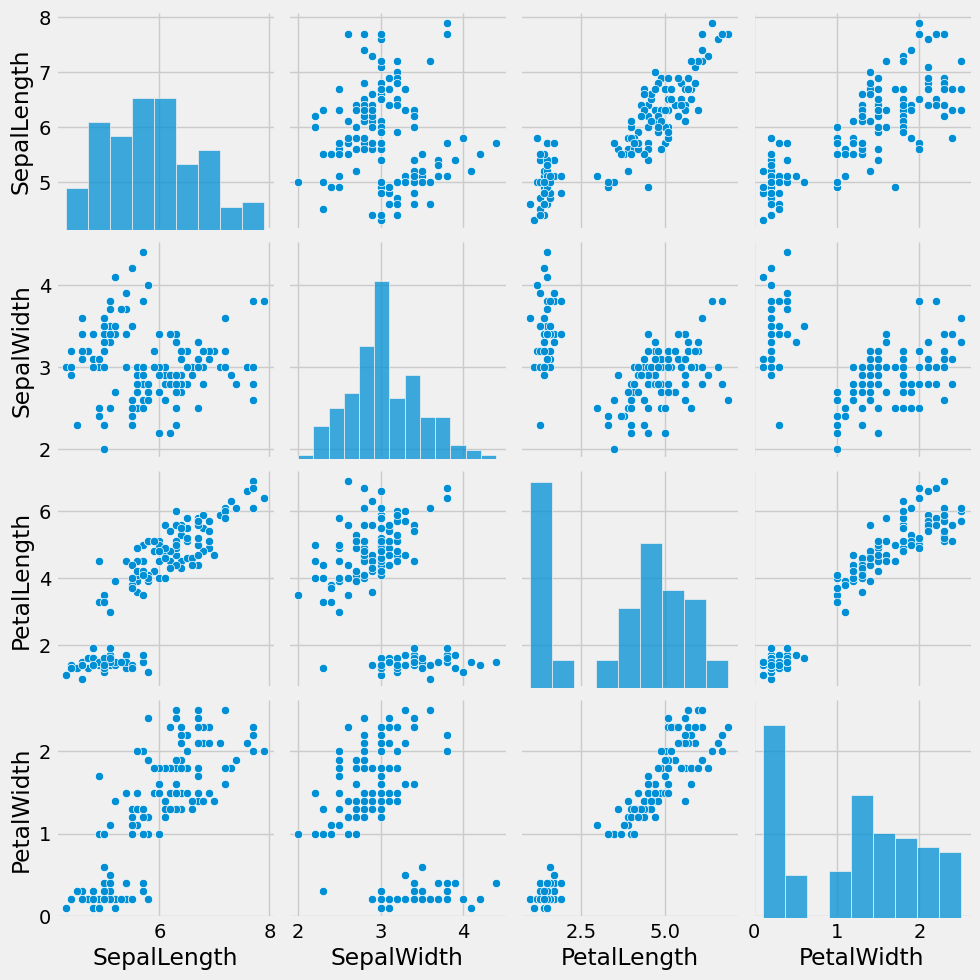

In [ ]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [ ]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


#clustering
1. Repeat the above exercise for different values of k
 - How do the inertia and silhouette scores change?
 - What if you don't scale your features?
 - Is there a 'right' k? Why or why not?


In [ ]:
#k=5
k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print("Inertia for k = 5 is", inertia)
print("Silhouette Score for k =5 is",metrics.silhouette_score(X_scaled, labels, metric='euclidean') )


#k = 10
k = 10
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print("Inertia for k = 10 is", inertia)
print("Silhouette Score for k = 10 is",metrics.silhouette_score(X_scaled, labels, metric='euclidean') )


#k = 15
k = 15
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print("Inertia for k = 15 is", inertia)
print("Silhouette Score for k = 15 is",metrics.silhouette_score(X_scaled, labels, metric='euclidean') )

# Answer - As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k = 5 is 4.571180508755744
Silhouette Score for k =5 is 0.351912893247111


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k = 10 is 2.524173321828269
Silhouette Score for k = 10 is 0.33306059643755914


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k = 15 is 1.7885245693479868
Silhouette Score for k = 15 is 0.3255723173492952


2. Repeat the following exercise for food nutrients dataset

In [71]:
df = pd.read_csv("nutrients.csv")
df.head(5)

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


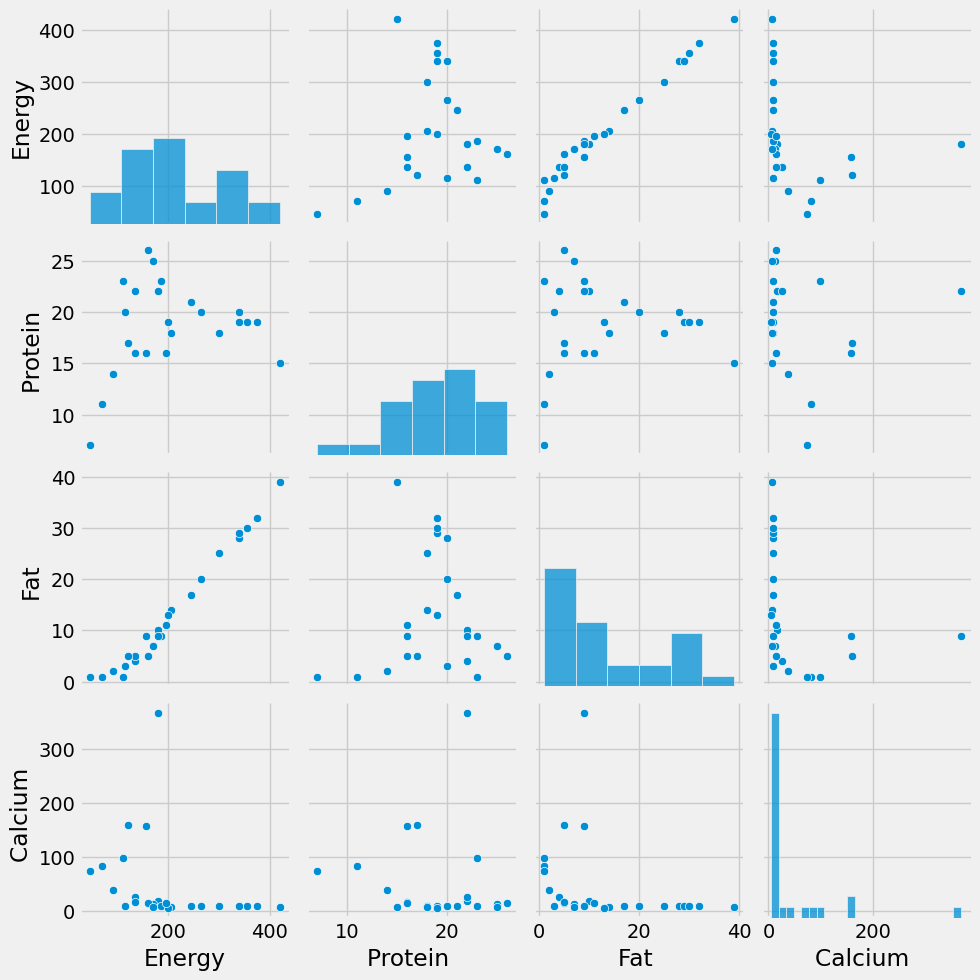

In [74]:
cols = df.columns[1:-1]
sns.pairplot(df[cols])

In [75]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])
pd.DataFrame(X_scaled, columns=cols).describe()

,Energy,Protein,Fat,Calcium
count,27.000000,27.000000,27.000000,27.000000
mean,0.433086,0.631579,0.328460,0.107632
std,0.269887,0.223773,0.296238,0.215564
min,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.500000,0.105263,0.011050
50%,0.360000,0.631579,0.210526,0.011050
75%,0.633333,0.789474,0.565789,0.073204
max,1.000000,1.000000,1.000000,1.000000


In [76]:
#k=2
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print("Inertia for k = 2 is", inertia)
print("Silhouette Score for k =2 is",metrics.silhouette_score(X_scaled, labels, metric='euclidean') )



#k=5
k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print("Inertia for k = 5 is", inertia)
print("Silhouette Score for k =5 is",metrics.silhouette_score(X_scaled, labels, metric='euclidean') )


#k = 10
k = 10
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print("Inertia for k = 10 is", inertia)
print("Silhouette Score for k = 10 is",metrics.silhouette_score(X_scaled, labels, metric='euclidean') )


#k = 15
k = 15
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print("Inertia for k = 15 is", inertia)
print("Silhouette Score for k = 15 is",metrics.silhouette_score(X_scaled, labels, metric='euclidean') )

# Answer - As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k = 2 is 3.2371633968623845
Silhouette Score for k =2 is 0.4665764109560025
Inertia for k = 5 is 0.9431628283460545
Silhouette Score for k =5 is 0.44940394193671446
Inertia for k = 10 is 0.22209119774199199
Silhouette Score for k = 10 is 0.4604409638596643
Inertia for k = 15 is 0.06675238703447395
Silhouette Score for k = 15 is 0.38911447454001036
